In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean

In [4]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [5]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [6]:
google_cloud_cmip6

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
523769,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523770,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523771,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523772,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [7]:
needed_models = ["CESM2", "MIROC6", "GFDL-ESM4"]
needed_institutions = ["NCAR", "MIROC", "NOAA-GFDL"]
needed_vars = ["tas", "pr"]
needed_exps = ["ssp245", "ssp585"]

# CESM2
cesm2_members = ["r1i1p1f1", "r11i1p1f1", "r41i1p1f1", "r101i1p1f1"]

subset = google_cloud_cmip6.query(
    "activity_id == 'ScenarioMIP' & "
    "table_id == 'Amon' & "
    "variable_id in @needed_vars & "
    "experiment_id in @needed_exps & "
    "source_id in @needed_models & "
    "institution_id in @needed_institutions & "
    "( (source_id == 'CESM2' & member_id in @cesm2_members) "
    "  or (source_id != 'CESM2' & member_id == 'r1i1p1f1') )"
)

In [12]:
subset

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15390,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
15454,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
18988,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
211300,ScenarioMIP,MIROC,MIROC6,ssp245,r1i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp2...,NaN,20190627
211663,ScenarioMIP,MIROC,MIROC6,ssp245,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp2...,NaN,20190627
212305,ScenarioMIP,MIROC,MIROC6,ssp585,r1i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp5...,NaN,20190627
212635,ScenarioMIP,MIROC,MIROC6,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp5...,NaN,20190627
444743,ScenarioMIP,NCAR,CESM2,ssp585,r11i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585...,NaN,20200528
444816,ScenarioMIP,NCAR,CESM2,ssp585,r11i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585...,NaN,20200528


In [13]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [14]:
gfdl_tas_ssp245_meta = subset[
    (subset["source_id"] == "GFDL-ESM4") &
    (subset["experiment_id"] == "ssp245") &
    (subset["variable_id"] == "tas")
]

In [15]:
gfdl_tas_ssp245_meta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15454,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [16]:
zstore_gfdl_tas_ssp245 = gfdl_tas_ssp245_meta.zstore.values[-1]

In [17]:
zstore_gfdl_tas_ssp245

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp245/r1i1p1f1/Amon/tas/gr1/v20180701/'

In [18]:
mapper_gfdl_tas_ssp245 = gcs.get_mapper(zstore_gfdl_tas_ssp245)

gfdl_tas_ssp245 = xr.open_zarr(
    mapper_gfdl_tas_ssp245,
    consolidated=True,
    use_cftime=True
).tas.rename({'lat': 'latitude', 'lon': 'longitude'})

In [19]:
gfdl_tas_ssp245

<xarray.DataArray 'tas' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 180, 288), dtype=float32, chunksize=(862, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

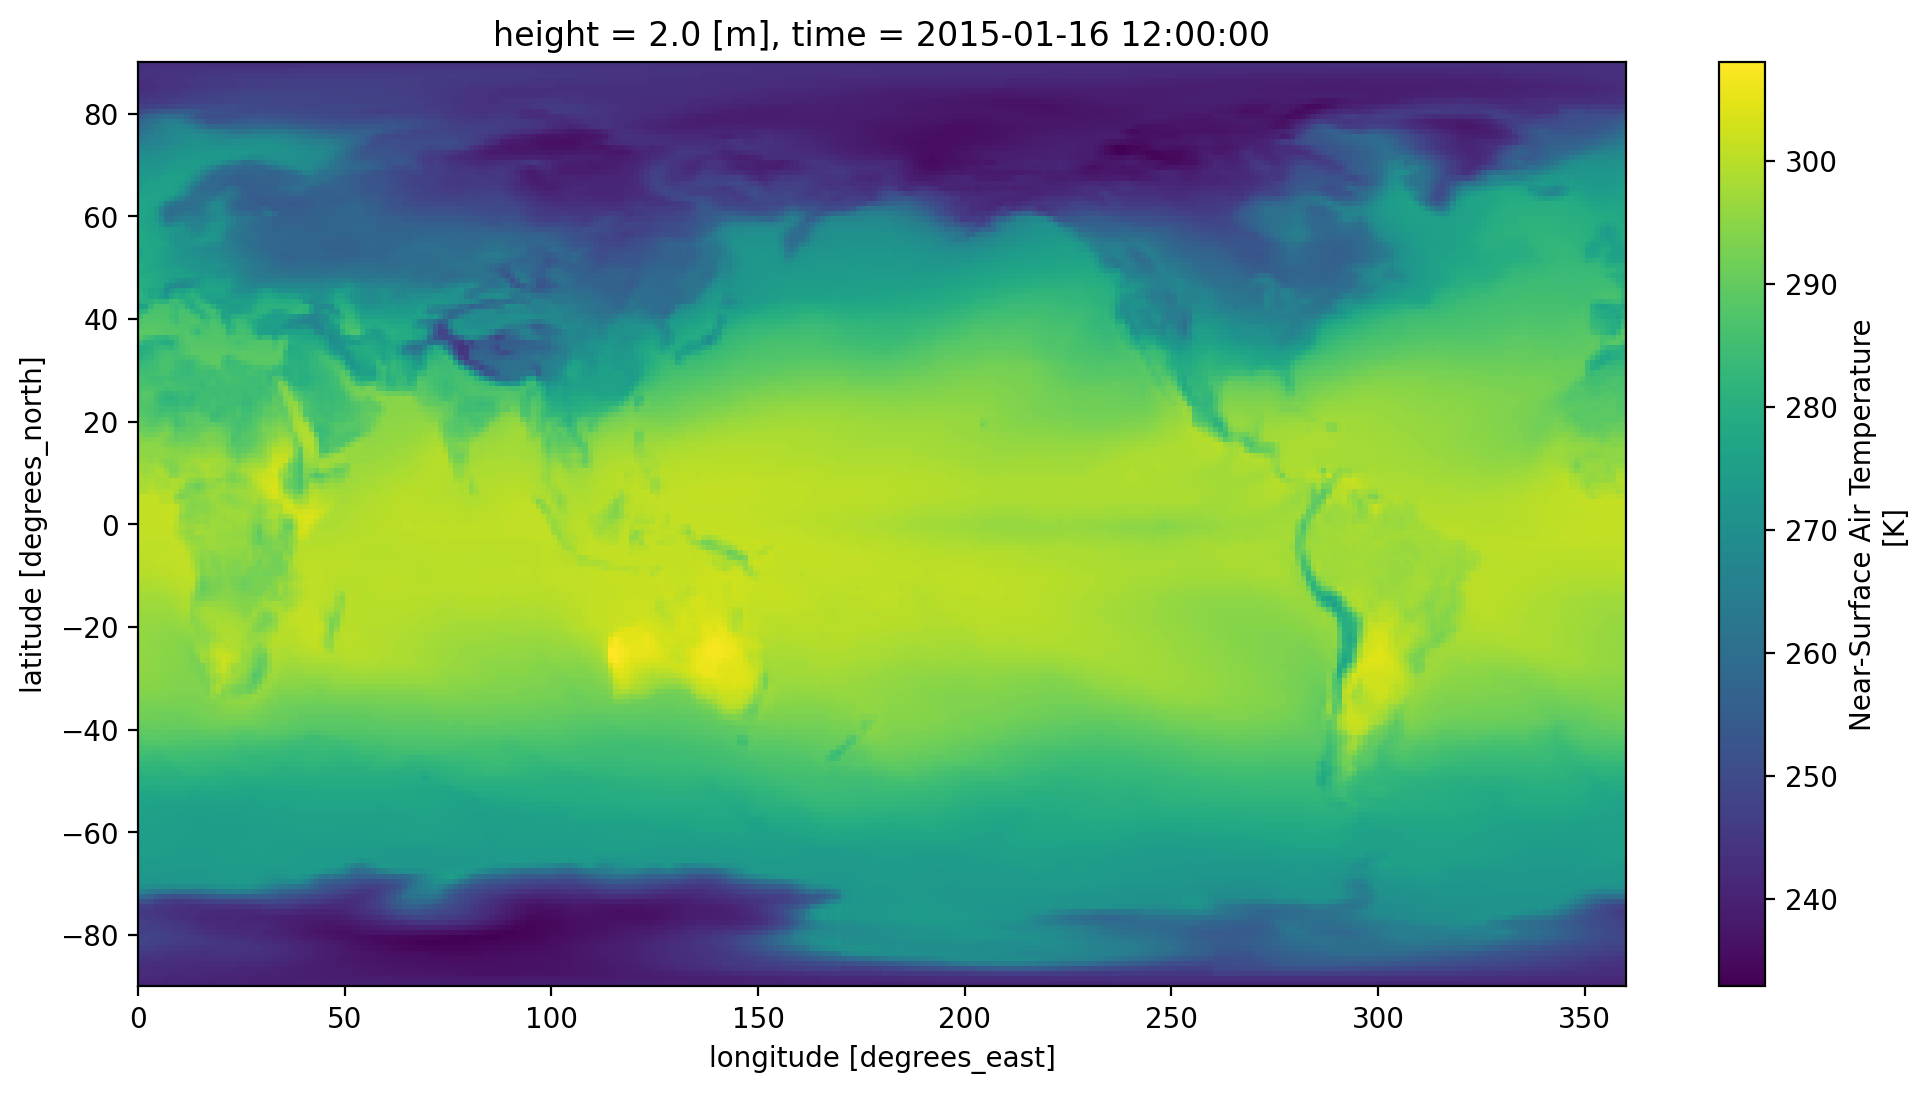

In [21]:
gfdl_tas_ssp245.sel(time='2015-01-16').plot()

In [29]:
gfdl_tas_ssp245_2041_2060 = gfdl_tas_ssp245.sel(
    time=slice('2041-01-01', '2060-12-31')
)

In [30]:
gfdl_tas_ssp245_2041_2060

<xarray.DataArray 'tas' (time: 240, latitude: 180, longitude: 288)>
dask.array<getitem, shape=(240, 180, 288), dtype=float32, chunksize=(240, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2041-01-16 12:00:00 ... 2060-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [25]:
NA_tas_2041_2060 = tas_2041_2060.sel(
    latitude=slice(10, 80),
    longitude=slice(220, 310)
)

In [31]:
NA_tas_2041_2060

<xarray.DataArray 'tas' (time: 240, latitude: 70, longitude: 72)>
dask.array<getitem, shape=(240, 70, 72), dtype=float32, chunksize=(240, 70, 72), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 10.5 11.5 12.5 13.5 ... 76.5 77.5 78.5 79.5
  * longitude  (longitude) float64 220.6 221.9 223.1 224.4 ... 306.9 308.1 309.4
  * time       (time) object 2041-01-16 12:00:00 ... 2060-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

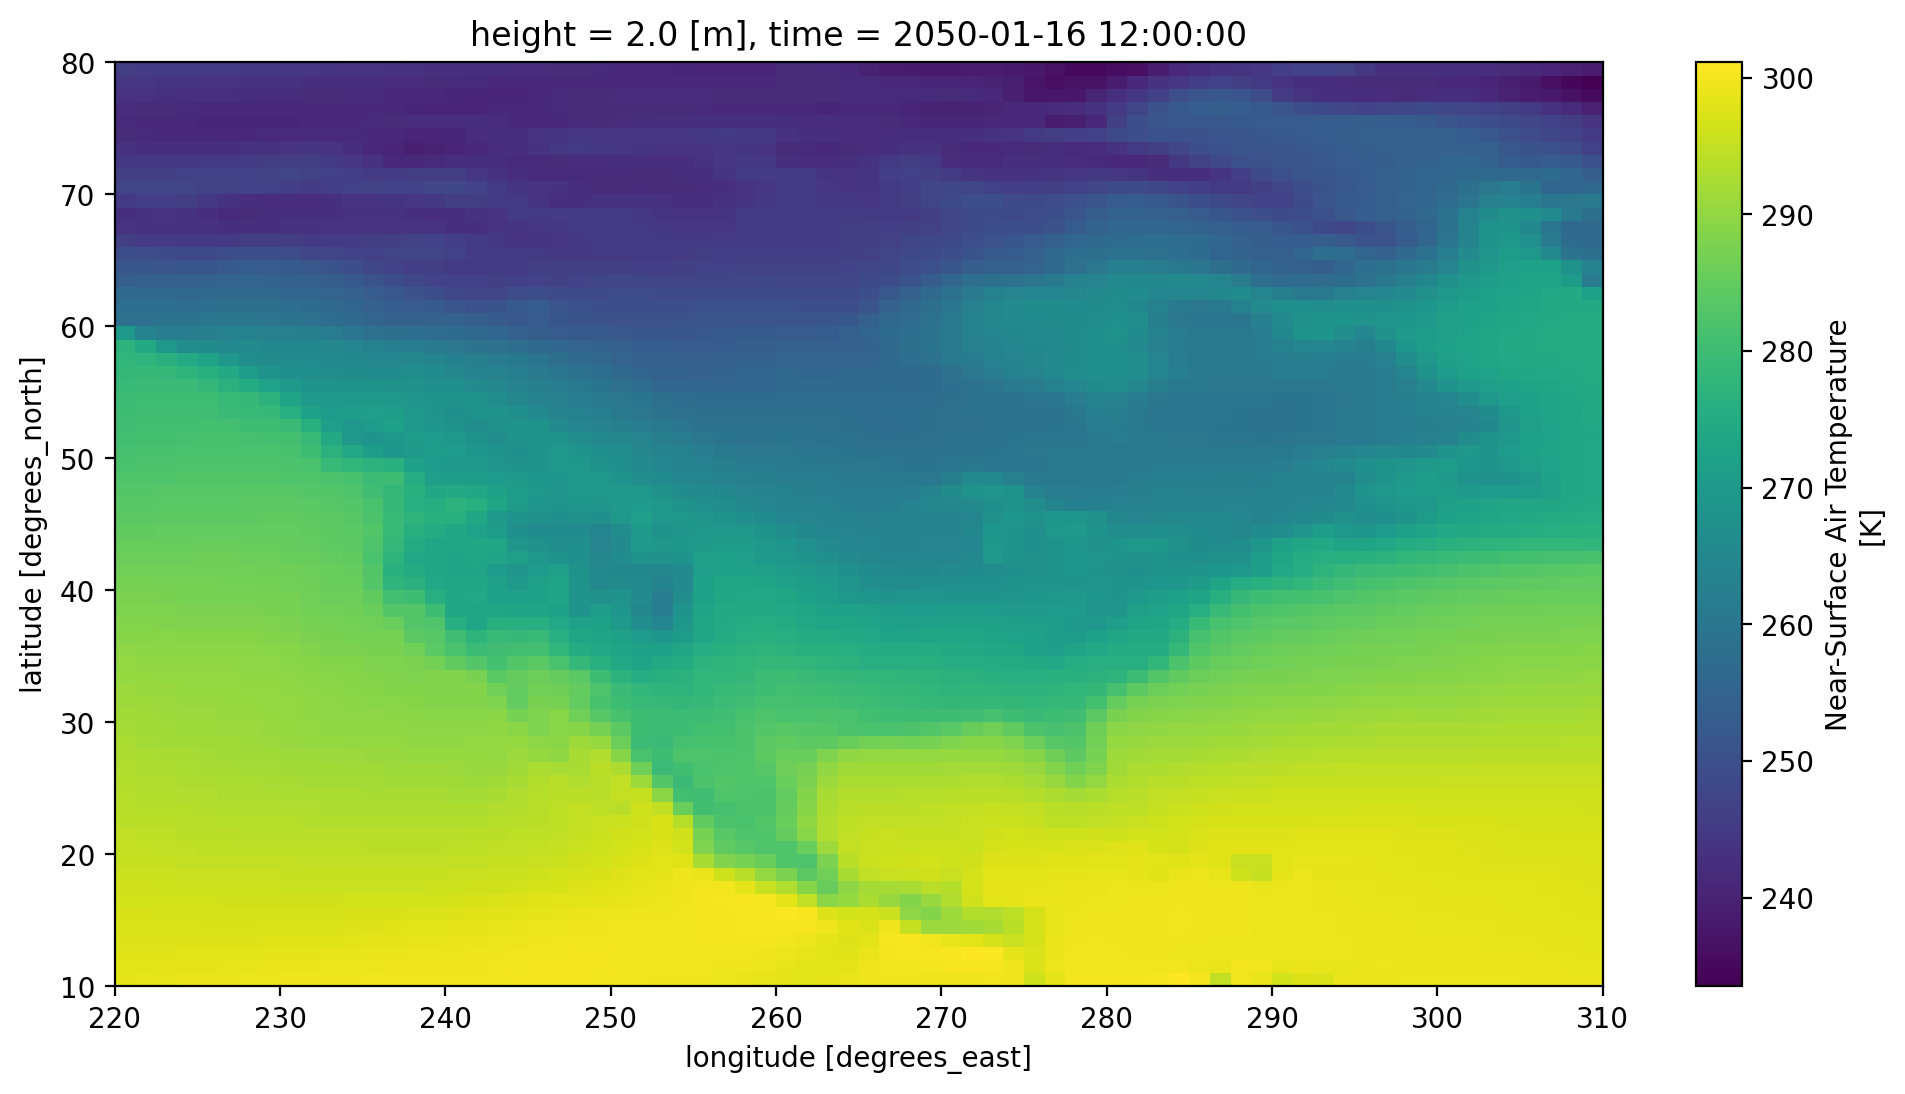

In [32]:
NA_tas_2041_2060.sel(time='2050-01-16').plot()

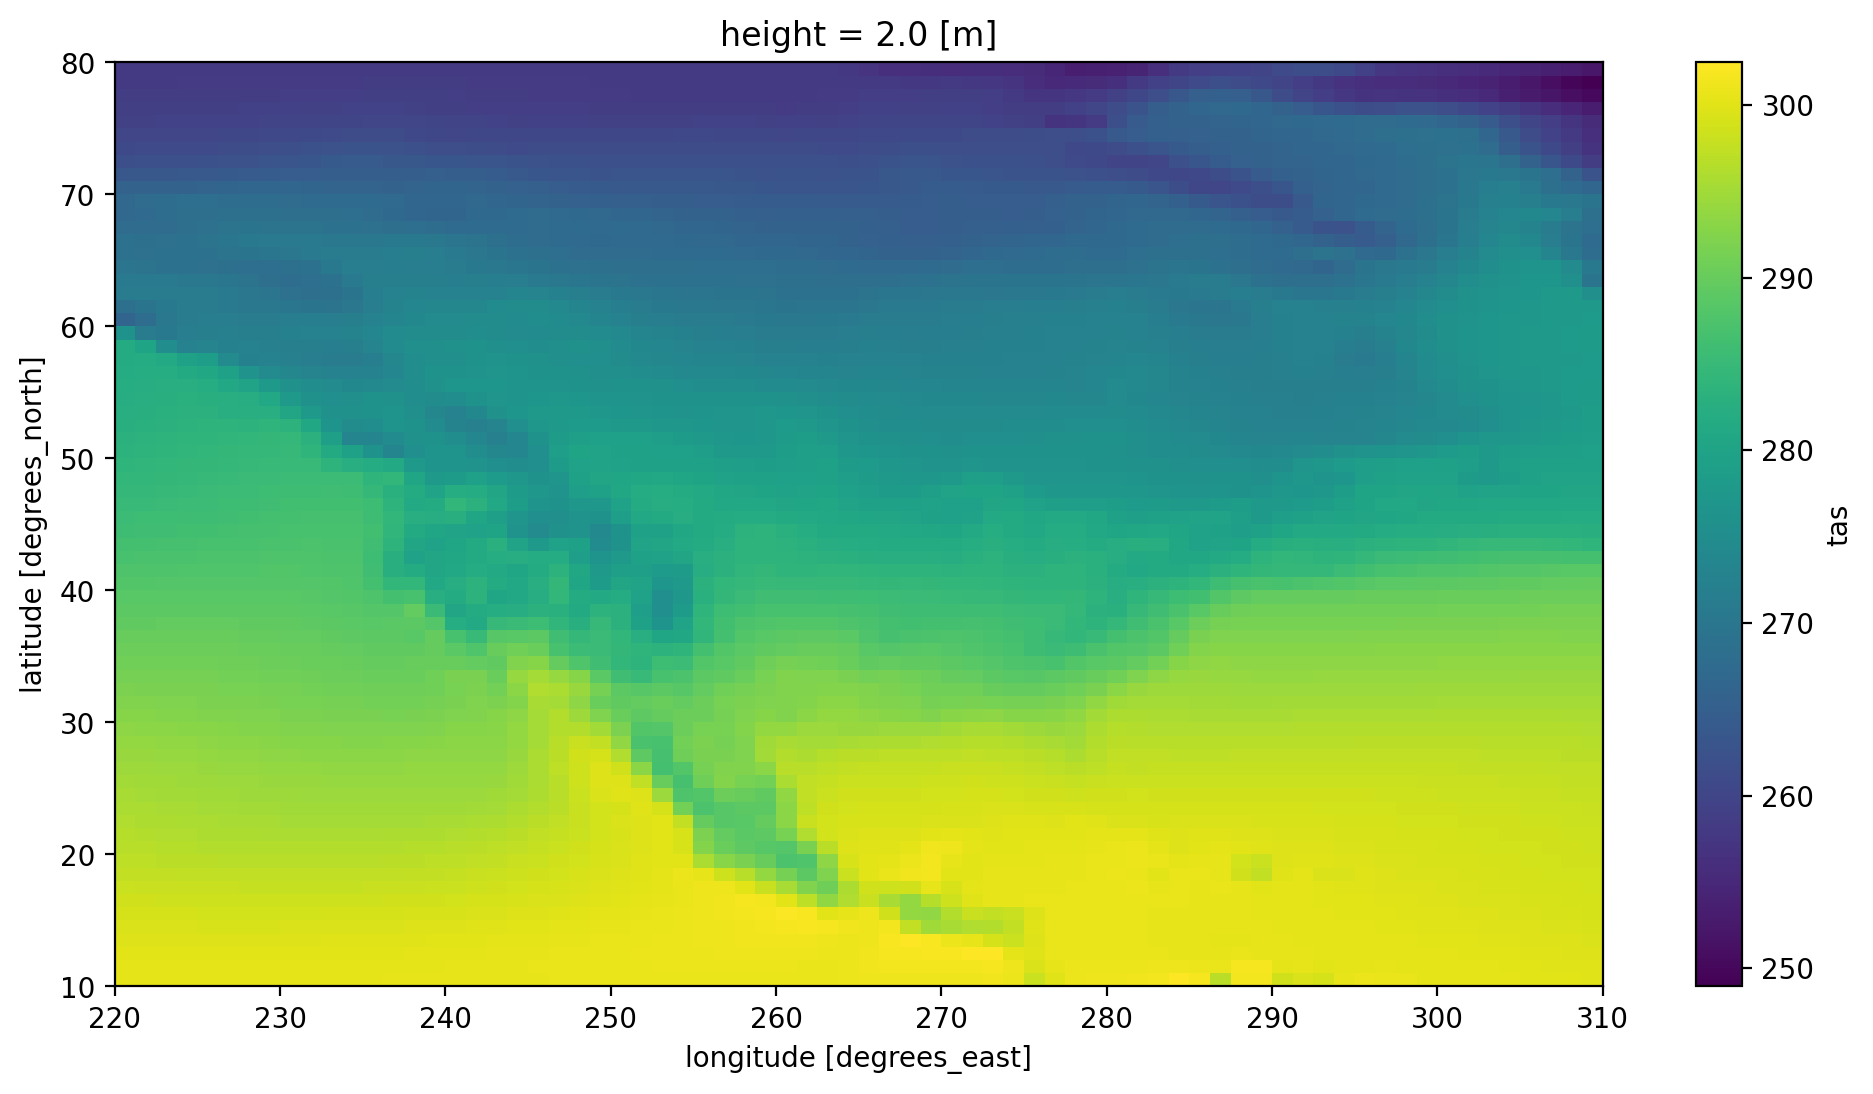

In [33]:
NA_tas_2041_2060.mean(dim='time').plot()

In [35]:
NA_ave_tas_2041_2060 = NA_tas_2041_2060.mean(dim=['latitude','longitude'])
NA_ave_tas_2041_2060

<xarray.DataArray 'tas' (time: 240)>
dask.array<mean_agg-aggregate, shape=(240,), dtype=float32, chunksize=(240,), chunktype=numpy.ndarray>
Coordinates:
    height   float64 ...
  * time     (time) object 2041-01-16 12:00:00 ... 2060-12-16 12:00:00

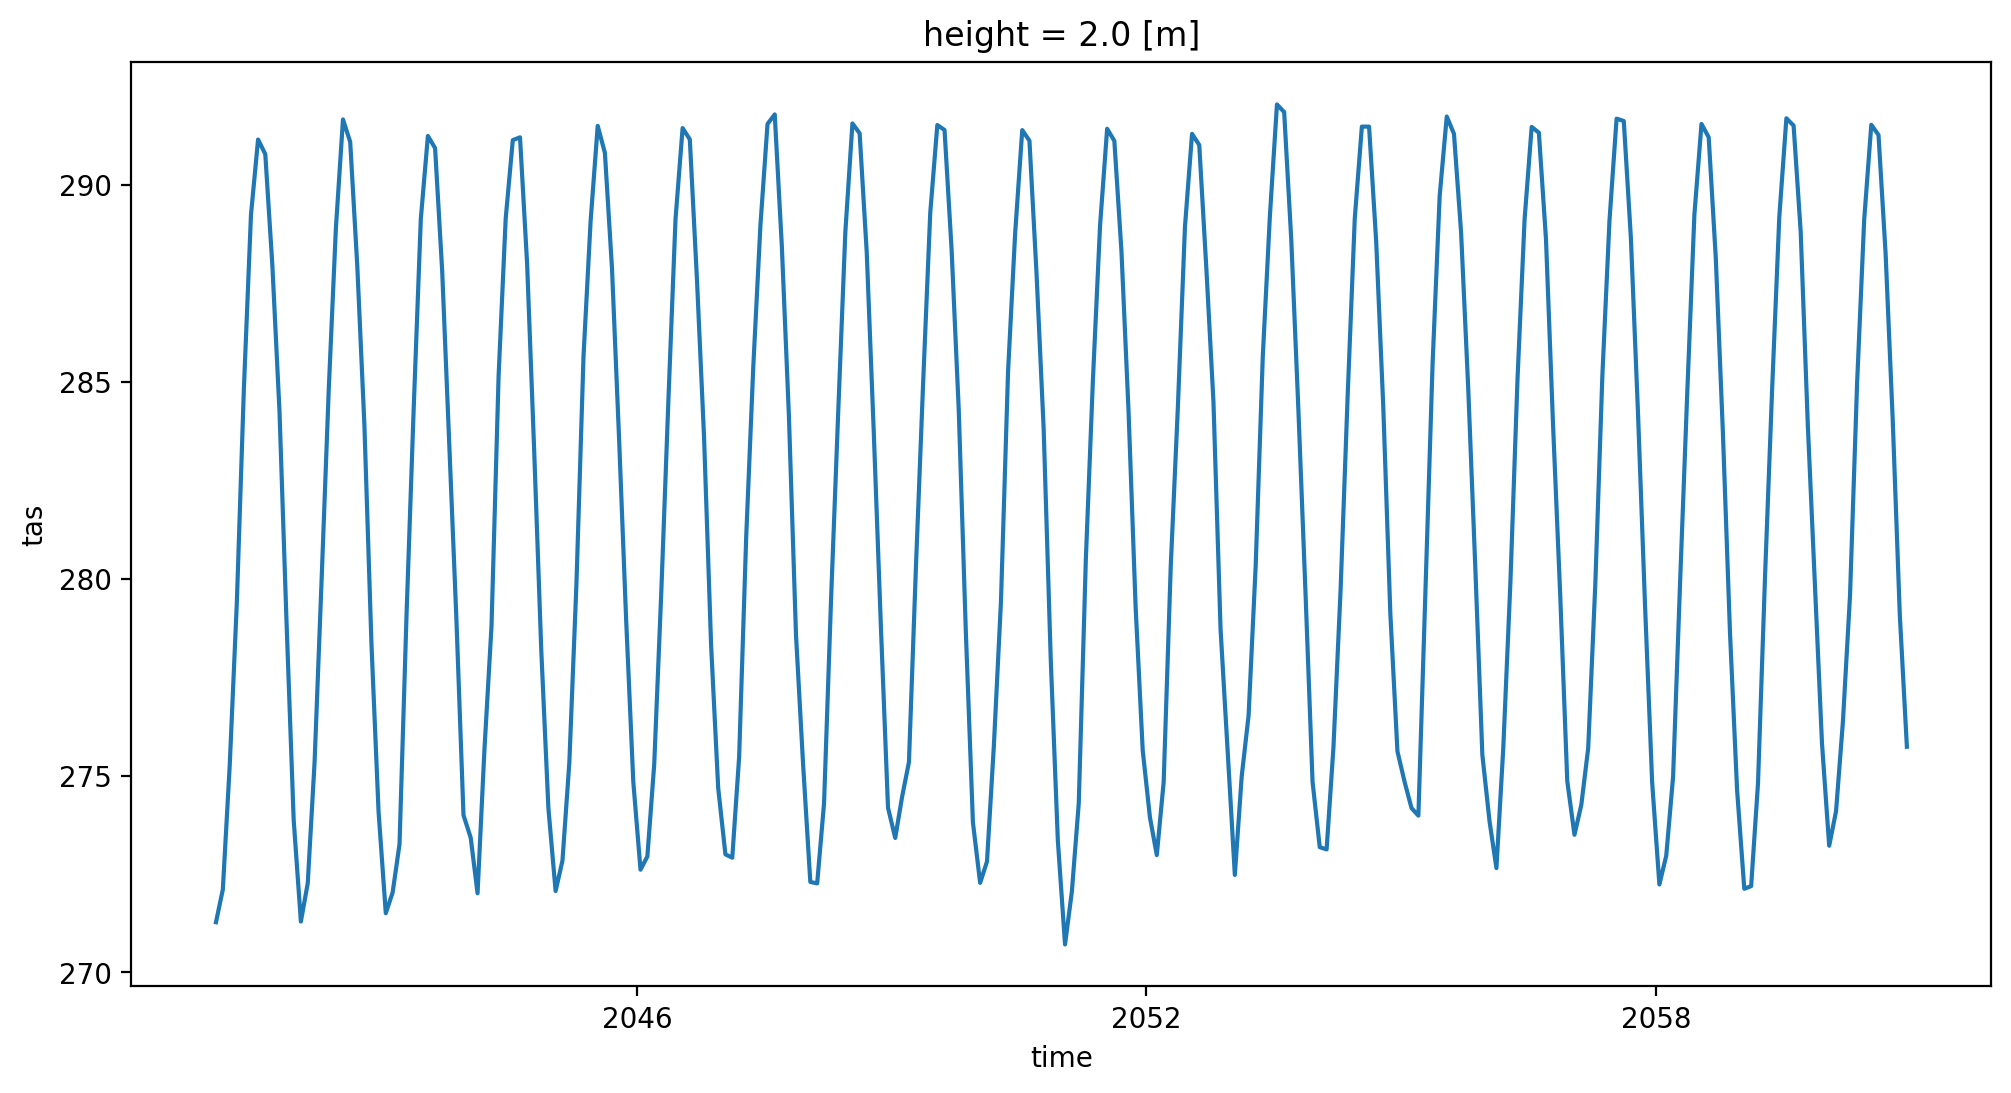

In [36]:
NA_ave_tas_2041_2060.plot()

In [37]:
NA_tas_2041_2060.mean(dim=['latitude','longitude','time'])

<xarray.DataArray 'tas' ()>
dask.array<mean_agg-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    height   float64 ...

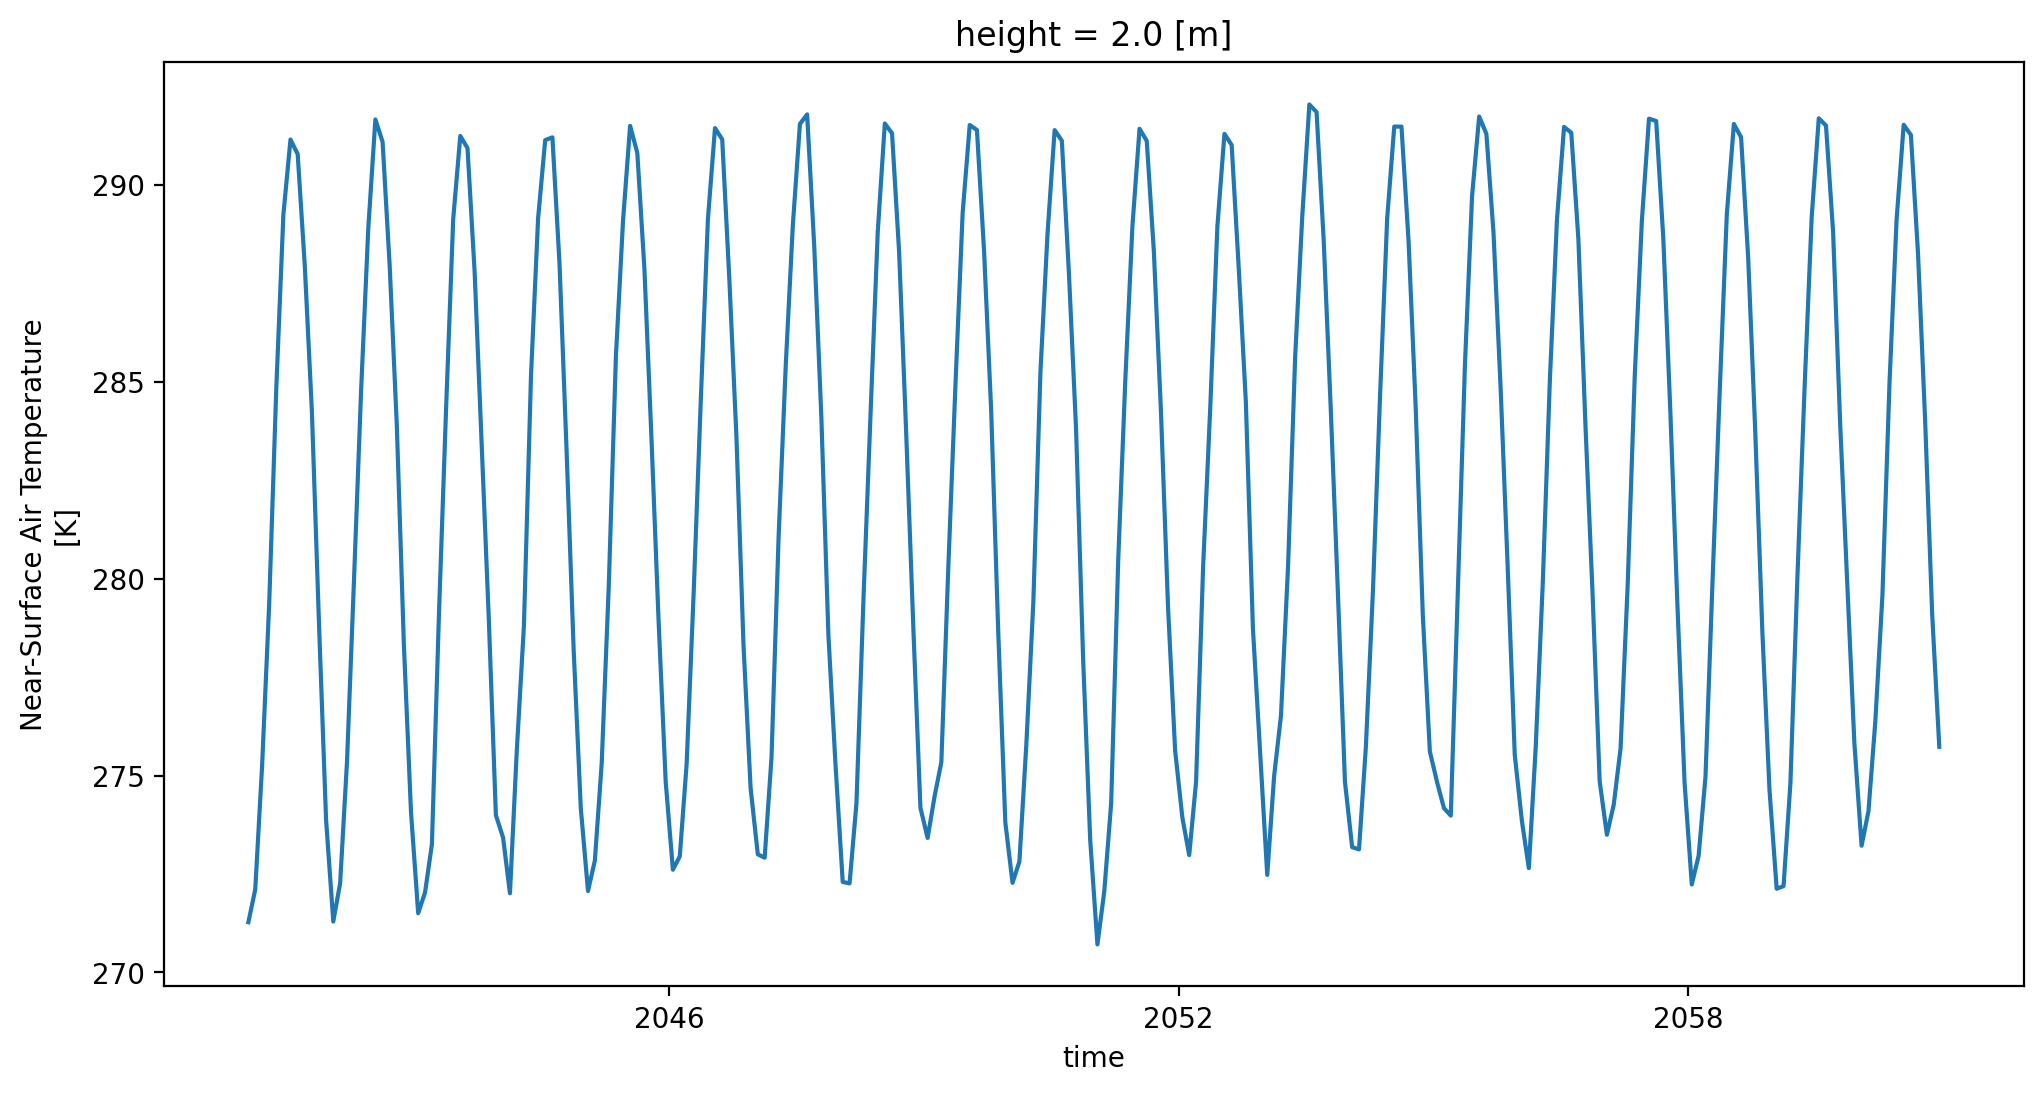

In [38]:
NA_yearly_tas = NA_tas_2041_2060.groupby('time.year').mean(dim=['latitude','longitude'])
NA_yearly_tas.plot()

In [58]:
gfdl_pr_ssp245_meta = subset[
    (subset["source_id"] == "GFDL-ESM4") &
    (subset["experiment_id"] == "ssp245") &
    (subset["variable_id"] == "pr")
]

In [59]:
gfdl_pr_ssp245_meta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15390,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [61]:
zstore_gfdl_pr_ssp245 = gfdl_pr_ssp245_meta.zstore.values[-1]

In [62]:
mapper_gfdl_pr_ssp245 = gcs.get_mapper(zstore_gfdl_pr_ssp245)
gfdl_pr_ssp245 = xr.open_zarr(
    mapper_gfdl_pr_ssp245,
    consolidated=True,
    use_cftime=True
).pr.rename({'lat': 'latitude', 'lon': 'longitude'})


In [63]:
gfdl_pr_ssp245

<xarray.DataArray 'pr' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-pr, shape=(1032, 180, 288), dtype=float32, chunksize=(618, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

In [65]:
gfdl_tas_ssp585_meta = subset[
    (subset["source_id"] == "GFDL-ESM4") &
    (subset["experiment_id"] == "ssp585") &
    (subset["variable_id"] == "tas")
]
gfdl_tas_ssp585_meta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [66]:
zstore_gfdl_tas_ssp585 = gfdl_tas_ssp585_meta.zstore.values[-1]

In [67]:
mapper_gfdl_tas_ssp585 = gcs.get_mapper(zstore_gfdl_tas_ssp585)

gfdl_tas_ssp585 = xr.open_zarr(
    mapper_gfdl_tas_ssp585,
    consolidated=True,
    use_cftime=True
).tas.rename({'lat': 'latitude', 'lon': 'longitude'})
gfdl_tas_ssp585

<xarray.DataArray 'tas' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 180, 288), dtype=float32, chunksize=(862, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [68]:
gfdl_pr_ssp585_meta = subset[
    (subset["source_id"] == "GFDL-ESM4") &
    (subset["experiment_id"] == "ssp585") &
    (subset["variable_id"] == "pr")
]
gfdl_pr_ssp585_meta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
18988,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [69]:
zstore_gfdl_pr_ssp585 = gfdl_pr_ssp585_meta.zstore.values[-1]

In [70]:
mapper_gfdl_pr_ssp585 = gcs.get_mapper(zstore_gfdl_pr_ssp585)

gfdl_pr_ssp585 = xr.open_zarr(
    mapper_gfdl_pr_ssp585,
    consolidated=True,
    use_cftime=True
).pr.rename({'lat': 'latitude', 'lon': 'longitude'})
gfdl_pr_ssp585

<xarray.DataArray 'pr' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-pr, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

In [71]:
miroc_tas_ssp245_meta = subset[
    (subset["source_id"] == "MIROC6") &
    (subset["experiment_id"] == "ssp245") &
    (subset["variable_id"] == "tas")
]

zstore_miroc_tas_ssp245 = miroc_tas_ssp245_meta.zstore.values[-1]
mapper_miroc_tas_ssp245 = gcs.get_mapper(zstore_miroc_tas_ssp245)

miroc_tas_ssp245 = xr.open_zarr(
    mapper_miroc_tas_ssp245,
    consolidated=True,
    use_cftime=True
).tas.rename({'lat': 'latitude', 'lon': 'longitude'})


In [72]:
miroc_tas_ssp245

<xarray.DataArray 'tas' (time: 1032, latitude: 128, longitude: 256)>
dask.array<open_dataset-tas, shape=(1032, 128, 256), dtype=float32, chunksize=(600, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * longitude  (longitude) float64 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    history:        2019-06-14T02:38:17Z altered by CMOR: Treated scalar dime...
    long_name:      Near-Surface Air Temperature
    original_name:  T2
    standard_name:  air_temperature
    units:          K

In [74]:
miroc_pr_ssp245_meta = subset[
    (subset["source_id"] == "MIROC6") &
    (subset["experiment_id"] == "ssp245") &
    (subset["variable_id"] == "pr")
]

zstore_miroc_pr_ssp245 = miroc_pr_ssp245_meta.zstore.values[-1]
mapper_miroc_pr_ssp245 = gcs.get_mapper(zstore_miroc_pr_ssp245)

miroc_pr_ssp245 = xr.open_zarr(
    mapper_miroc_pr_ssp245,
    consolidated=True,
    use_cftime=True
).pr.rename({'lat': 'latitude', 'lon': 'longitude'})


In [75]:
miroc_pr_ssp245

<xarray.DataArray 'pr' (time: 1032, latitude: 128, longitude: 256)>
dask.array<open_dataset-pr, shape=(1032, 128, 256), dtype=float32, chunksize=(600, 128, 256), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * longitude  (longitude) float64 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:   area: areacella
    cell_methods:    area: time: mean
    comment:         includes both liquid and solid phases
    history:         2019-06-14T02:35:47Z altered by CMOR: Converted units fr...
    long_name:       Precipitation
    original_name:   PRCP
    original_units:  kg/m**2/s
    standard_name:   precipitation_flux
    units:           kg m-2 s-1

In [76]:
miroc_tas_ssp585_meta = subset[
    (subset["source_id"] == "MIROC6") &
    (subset["experiment_id"] == "ssp585") &
    (subset["variable_id"] == "tas")
]

zstore_miroc_tas_ssp585 = miroc_tas_ssp585_meta.zstore.values[-1]
mapper_miroc_tas_ssp585 = gcs.get_mapper(zstore_miroc_tas_ssp585)

miroc_tas_ssp585 = xr.open_zarr(
    mapper_miroc_tas_ssp585,
    consolidated=True,
    use_cftime=True
).tas.rename({'lat': 'latitude', 'lon': 'longitude'})


In [77]:
miroc_tas_ssp585

<xarray.DataArray 'tas' (time: 1032, latitude: 128, longitude: 256)>
dask.array<open_dataset-tas, shape=(1032, 128, 256), dtype=float32, chunksize=(600, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height     float64 ...
  * latitude   (latitude) float64 -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * longitude  (longitude) float64 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    history:        2019-06-19T09:14:02Z altered by CMOR: Treated scalar dime...
    long_name:      Near-Surface Air Temperature
    original_name:  T2
    standard_name:  air_temperature
    units:          K

In [78]:
miroc_pr_ssp585_meta = subset[
    (subset["source_id"] == "MIROC6") &
    (subset["experiment_id"] == "ssp585") &
    (subset["variable_id"] == "pr")
]

zstore_miroc_pr_ssp585 = miroc_pr_ssp585_meta.zstore.values[-1]
mapper_miroc_pr_ssp585 = gcs.get_mapper(zstore_miroc_pr_ssp585)

miroc_pr_ssp585 = xr.open_zarr(
    mapper_miroc_pr_ssp585,
    consolidated=True,
    use_cftime=True
).pr.rename({'lat': 'latitude', 'lon': 'longitude'})


In [79]:
miroc_pr_ssp585

<xarray.DataArray 'pr' (time: 1032, latitude: 128, longitude: 256)>
dask.array<open_dataset-pr, shape=(1032, 128, 256), dtype=float32, chunksize=(600, 128, 256), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * longitude  (longitude) float64 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:   area: areacella
    cell_methods:    area: time: mean
    comment:         includes both liquid and solid phases
    history:         2019-06-19T09:15:05Z altered by CMOR: Converted units fr...
    long_name:       Precipitation
    original_name:   PRCP
    original_units:  kg/m**2/s
    standard_name:   precipitation_flux
    units:           kg m-2 s-1

In [80]:
cesm2_tas_ssp245_meta = subset[
    (subset["source_id"] == "CESM2") &
    (subset["experiment_id"] == "ssp245") &
    (subset["variable_id"] == "tas")
]

zstore_cesm2_tas_ssp245 = cesm2_tas_ssp245_meta.zstore.values[-1]
mapper_cesm2_tas_ssp245 = gcs.get_mapper(zstore_cesm2_tas_ssp245)

cesm2_tas_ssp245 = xr.open_zarr(
    mapper_cesm2_tas_ssp245,
    consolidated=True,
    use_cftime=True
).tas.rename({'lat': 'latitude', 'lon': 'longitude'})


In [81]:
cesm2_tas_ssp245

<xarray.DataArray 'tas' (time: 1032, latitude: 192, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 192, 288), dtype=float32, chunksize=(408, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [82]:
cesm2_pr_ssp245_meta = subset[
    (subset["source_id"] == "CESM2") &
    (subset["experiment_id"] == "ssp245") &
    (subset["variable_id"] == "pr")
]

zstore_cesm2_pr_ssp245 = cesm2_pr_ssp245_meta.zstore.values[-1]
mapper_cesm2_pr_ssp245 = gcs.get_mapper(zstore_cesm2_pr_ssp245)

cesm2_pr_ssp245 = xr.open_zarr(
    mapper_cesm2_pr_ssp245,
    consolidated=True,
    use_cftime=True
).pr.rename({'lat': 'latitude', 'lon': 'longitude'})


In [83]:
cesm2_pr_ssp245

<xarray.DataArray 'pr' (time: 1032, latitude: 192, longitude: 288)>
dask.array<open_dataset-pr, shape=(1032, 192, 288), dtype=float32, chunksize=(288, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        chunits( ((1000 * PRECT)), units="kg m-2 s-1")
    description:    at surface; includes both liquid and solid phases from al...
    frequency:      mon
    id:             pr
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Precipitation
    type:           real
    units:          kg m-2 s-1
    variable_id:    pr

In [84]:
cesm2_tas_ssp585_meta = subset[
    (subset["source_id"] == "CESM2") &
    (subset["experiment_id"] == "ssp585") &
    (subset["variable_id"] == "tas")
]

zstore_cesm2_tas_ssp585 = cesm2_tas_ssp585_meta.zstore.values[-1]
mapper_cesm2_tas_ssp585 = gcs.get_mapper(zstore_cesm2_tas_ssp585)

cesm2_tas_ssp585 = xr.open_zarr(
    mapper_cesm2_tas_ssp585,
    consolidated=True,
    use_cftime=True
).tas.rename({'lat': 'latitude', 'lon': 'longitude'})


In [85]:
cesm2_tas_ssp585

<xarray.DataArray 'tas' (time: 1032, latitude: 192, longitude: 288)>
dask.array<open_dataset-tas, shape=(1032, 192, 288), dtype=float32, chunksize=(408, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [86]:
cesm2_pr_ssp585_meta = subset[
    (subset["source_id"] == "CESM2") &
    (subset["experiment_id"] == "ssp585") &
    (subset["variable_id"] == "pr")
]

zstore_cesm2_pr_ssp585 = cesm2_pr_ssp585_meta.zstore.values[-1]
mapper_cesm2_pr_ssp585 = gcs.get_mapper(zstore_cesm2_pr_ssp585)

cesm2_pr_ssp585 = xr.open_zarr(
    mapper_cesm2_pr_ssp585,
    consolidated=True,
    use_cftime=True
).pr.rename({'lat': 'latitude', 'lon': 'longitude'})


In [87]:
cesm2_pr_ssp585

<xarray.DataArray 'pr' (time: 1032, latitude: 192, longitude: 288)>
dask.array<open_dataset-pr, shape=(1032, 192, 288), dtype=float32, chunksize=(288, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        chunits( ((1000 * PRECT)), units="kg m-2 s-1")
    description:    at surface; includes both liquid and solid phases from al...
    frequency:      mon
    id:             pr
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Precipitation
    type:           real
    units:          kg m-2 s-1
    variable_id:    pr